

# Problem Statement

**Dataset:** The dogs vs. cats dataset is standard computer vision dataset that involves classifying photos as either containing a dog or cat. It was only effectively addressed in the last years using deep learning convolutional neural networks. While the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification.


**Tasks to be performed**
* Prepare the dataset for the model
* Install Tensorflow 2.x
* Develop convolutional neural network model for classifying the images of Dogs vs. Cats
* Plot the change in accuracy per epochs
* Evalutae the model on the testing data.
* Analyse the model summary
* Add Dropout to prevent overfitting and check its effect on accuracy
* Increasing the number of hidden Layers check its effect on accuracy
* Manipulate the batch_size and epochs and check its effect on accuracy.

In [3]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2021-05-27 08:24:33--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2021-05-27 08:24:34--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc118e1e1b9468280f7b51392679.dl.dropboxusercontent.com/cd/0/inline/BPTby5rIg3QlSxCOVDqLW7-LNGTI8hqVnfD3a3M9tDLoBbErJGKmCXjAJ20MB9vx6WwCbPSfDkqoVpCjkBm5mK3K_6Mt2pYmnBH6yoJTrpTwpmX1W0kP3I7QdY43Bm8ZOKFiSXDWzxgVCIM5YoLJgskW/file# [following]
--2021-05-27 08:24:34--  https://uc118e1e1b9468280f7b51392679.dl.dropboxusercontent.com/cd/0/inline/BPTby5rIg3QlSxCOVDqLW7-LNGTI8hqVnfD3a3M9tDLoBbErJGKmCXjAJ20MB9vx6WwCbPSfDkq

In [5]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Populating the interactive namespace from numpy and matplotlib


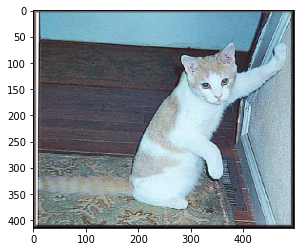

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot = plt.imshow(img)
plt.show()

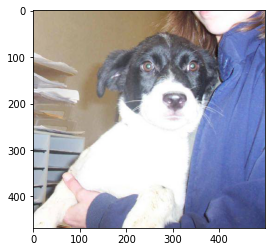

In [7]:
img = mpimg.imread('/content/test_set/test_set/dogs/dog.4010.jpg')
imgplot = plt.imshow(img)
plt.show()

# Importing Libraries

In [8]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
print(tensorflow.__version__)

2.5.0


# Designing the Model

## Initialize the parameters

In [ ]:
img_width, img_height = 100,100 # width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir = r"/content/test_set/test_set"
nb_train_sample = 100
nb_validation_sample = 100
epochs = 20
batch_size = 20

## Check the shape of the image

Two ways to represent the image data as a three dimensional array
1. **Channels Last: Image data is represented in a three-dimensional array where the last channel represents the colour channel, e.g.[rows][cols][channels].**

2. **Channel First: Image data is represented in a three-dimensional array where the first channel represents the color channels, e.g. [channels][rows][cols]**

In [11]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channel_first':
  input_shape = (3,img_width, img_height)
else:
  input_shape = (img_width, img_height, 3)

# Generate Imgaes to train the model
1. Rescale
2. Shear_range
3. Zoom_range
4. Horizontal_flip

* This class allows to configure random transformations and normalization on the allocated during training time
* Prevents overfitting and helps to generate a generalize model
* Never repeats the exact same images twice to train our model.

In [12]:
train_datagen = ImageDataGenerator(rescale=1. /255, shear_range=0.2,
                                    zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. /255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width,img_height),
                                                    batch_size=batch_size, class_mode='binary')
# Now, this will geenrate training generator data
#target_size = mentioned image width and iamge height
# batch_size = 20(already mentioned)
# class_size = binary(becuase here only two classes are there to classify)

validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_width,img_height), 
                                                        batch_size=batch_size, class_mode='binary')

#Now, this will generate testing generator data

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## Visual Representation of ImageDataGenerator

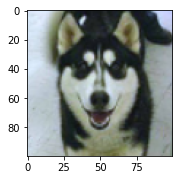

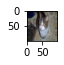

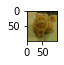

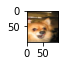

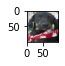

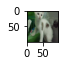

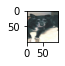

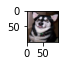

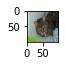

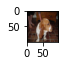

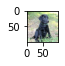

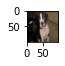

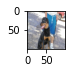

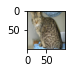

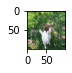

In [13]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch, y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
  plt.tight_layout()
  plt.show()

## Build the basic CNN model 0

### Layers in CNN:
1. convolutional Layer
2. ReLu
3. Pooling Layer
4. Fully Connected Layer(Dense)

* Adding convolutional nueral network in the model
* add() - helps to add layers in the model
* conv2D() - convolutional layer(to extract features from the images)
* conv2D(32,(3,3),input_shape=input_shape)
 * 32 - Take 32 features from the given image
 * (3,3) - Metrics size of the images(3*3)
 * input_shape = image size
* Activation function (relu) is added to remove the negative values.

In [14]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) # 64 neurons with 3*3 filter
# This class allows to create convolutional neural network to extract feature from the images
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling2D helps to reduce the size of the data
model.add(Flatten())
model.add(Dense(64)) # 64 neurons with 3*3 filter
# Number of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1)) # output layer
model.add(Activation('sigmoid')) # sigmoid activation function
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                9834560   
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

## Complete the basic CNN model

In [15]:
model.compile(optimizer='rmsprop',
               loss='binary_crossentropy',
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                9834560   
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

## Fit the basic CNN model

In [16]:
training = model.fit(train_generator,
                                steps_per_epoch = nb_train_sample,epochs=epochs,
                               validation_data=validation_generator,
                                validation_steps= nb_validation_sample)

Epoch 1/20
100/100 [==============================] - 46s 167ms/step - loss: 1.0155 - accuracy: 0.5560 - val_loss: 0.7251 - val_accuracy: 0.5365
Epoch 2/20
100/100 [==============================] - 17s 167ms/step - loss: 0.6451 - accuracy: 0.6400 - val_loss: 0.6533 - val_accuracy: 0.6530
Epoch 3/20
100/100 [==============================] - 17s 166ms/step - loss: 0.6210 - accuracy: 0.6595 - val_loss: 0.6144 - val_accuracy: 0.6705
Epoch 4/20
100/100 [==============================] - 17s 165ms/step - loss: 0.6373 - accuracy: 0.6580 - val_loss: 0.5964 - val_accuracy: 0.6945
Epoch 5/20
100/100 [==============================] - 17s 166ms/step - loss: 0.6195 - accuracy: 0.6660 - val_loss: 0.5876 - val_accuracy: 0.7045
Epoch 6/20
100/100 [==============================] - 16s 165ms/step - loss: 0.6071 - accuracy: 0.6605 - val_loss: 0.5808 - val_accuracy: 0.7040
Epoch 7/20
100/100 [==============================] - 21s 216ms/step - loss: 0.5960 - accuracy: 0.6795 - val_loss: 0.6085 - val_ac

## Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


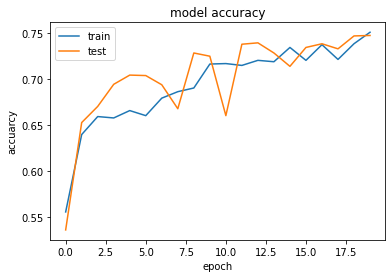

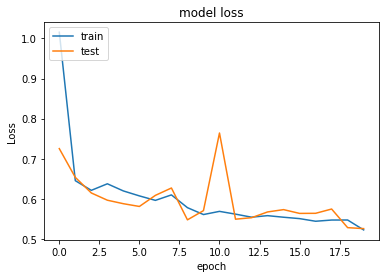

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuarcy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

## Predict the image

### 1st Prediction

[[1.]]
Prediction Dog


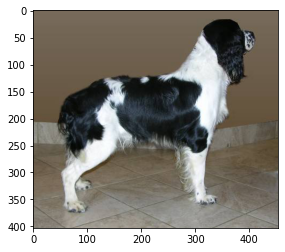

In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img('/content/test_set/test_set/dogs/dog.4005.jpg',target_size=(100,100))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
  prediction = 'Dog'
else:
  prediction = 'Cat'
print('Prediction', prediction)

img = mpimg.imread('/content/test_set/test_set/dogs/dog.4005.jpg')
imgplot = plt.imshow(img)
plt.show()

### 2nd Predictrion

[[8.167545e-26]]
Prediction Cat


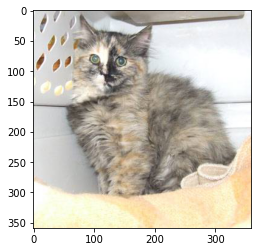

In [21]:
img_pred = image.load_img('/content/test_set/test_set/cats/cat.4005.jpg',target_size=(100,100))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
  prediction = 'Dog'
else:
  prediction = 'Cat'
print('Prediction', prediction)

img = mpimg.imread('/content/test_set/test_set/cats/cat.4005.jpg')
imgplot = plt.imshow(img)
plt.show()